In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [6]:
directory = 'data/Respiratory_Sound_Database/audio_and_txt_files'
dataset = []
        
sample_rate = 4000
mfcc_size = 13

for file in os.listdir(directory):
    
    if file.endswith('.wav'):
        file_path = os.path.join(directory, file)

        data, _ = librosa.load(file_path)

        trimmed_data, _ = librosa.effects.trim(y=data)

        mfccs = librosa.feature.mfcc(y=trimmed_data, 
                                        sr=sample_rate, 
                                        n_mfcc=mfcc_size)

        stddev_mfccs = np.std(mfccs, axis=1)

        mean_mfccs = np.mean(mfccs, axis=1)

        average_difference = np.zeros((mfcc_size,))
        for i in range(0, len(mfccs.T) - 2, 2):
            average_difference += mfccs.T[i] - mfccs.T[i+1]
        average_difference /= (len(mfccs) // 2)   
        average_difference = np.array(average_difference)

        concat_features = np.hstack((stddev_mfccs, mean_mfccs))
        concat_features = np.hstack((concat_features, average_difference))
        
        dataset += [(file, concat_features)]

In [7]:
all_file_paths, mfcc_features = zip(*dataset)
    
mfcc_features = np.array(mfcc_features)

mfcc_tuples = []

all_json = dict()
all_json["filenames"] = all_file_paths

print(len(all_file_paths), 
      mfcc_features.shape)

920 (920, 39)


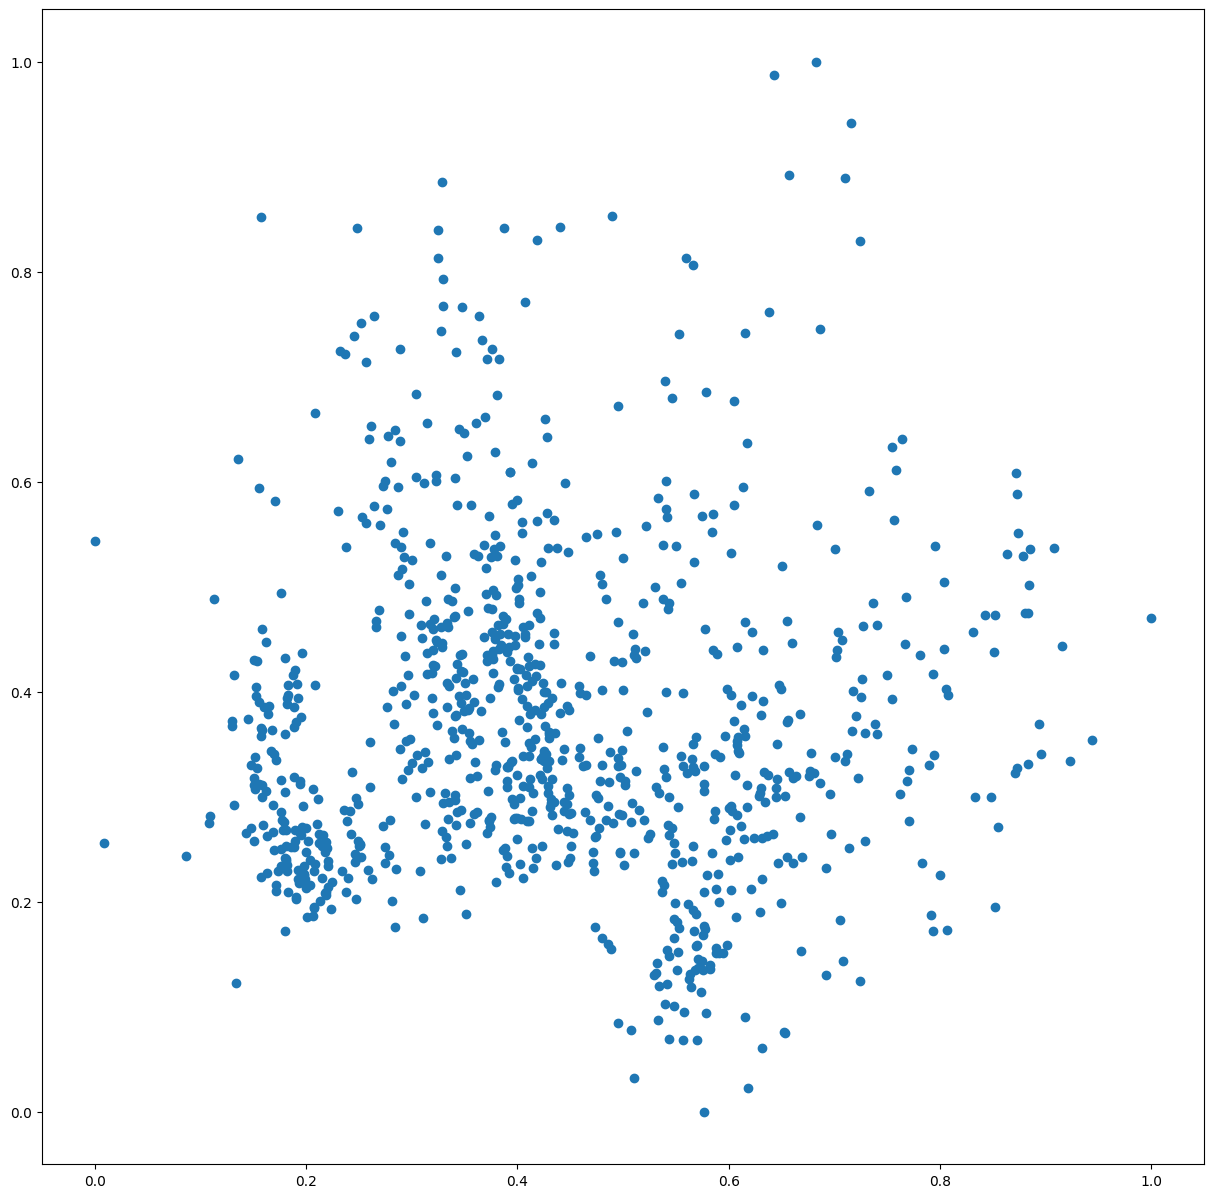

In [8]:
def transform_numpy_to_json(array):
    data = []
    for position in array:
        data.append({
            'coordinates': position.tolist()
        })
    return data

def get_pca(features):
    pca = PCA(n_components=2)
    transformed = pca.fit(features).transform(features)
    scaler = MinMaxScaler()
    scaler.fit(transformed)
    return scaler.transform(transformed)

pca_mfcc = get_pca(mfcc_features)

mfcc_key = 'pcamfcc'

all_json[mfcc_key] = transform_numpy_to_json(pca_mfcc)
plt.figure(figsize=(15, 15))
_ = plt.scatter(pca_mfcc.T[0],
                pca_mfcc.T[1])
plt.show()